In [11]:
from ehyd_tools.in_out import get_station_reference_data, STATIONS_PRECIPITATION_HIGH_RES
from pyproj import Transformer
from shapely.geometry import Point
import geopandas as gpd

In [2]:
lables = ['Sillian',
          'Liezen',
          'Klagenfurt',
          'Bregenz',
          'Graz-Andritz',
          'Linz-Urfahr',
          'Wien (Botanischer Garten)',
          'Hollabrunn']


In [3]:
ehyd_stations_ = {v: k for k, v in STATIONS_PRECIPITATION_HIGH_RES.items()}

In [19]:
def degree_to_decimal(degree, minutes, seconds):
    return float(degree) + float(minutes) / 60 + float(seconds) / 60 / 60


def convert_geo(g):
    l = degree_to_decimal(*g['Länge (Grad,Min,Sek)'].split())
    b = degree_to_decimal(*g['Breite  (Grad,Min,Sek)'].split())
    # https://epsg.io/4004
    # https://epsg.io/32633
    return l, b
    # transformer = Transformer.from_crs(4004, 32633, always_xy=True)
    # return transformer.transform(l, b)


In [25]:
res = dict()
for l in lables:
    m = get_station_reference_data(ehyd_stations_[l])
    g = m['Geographische Koordinaten (Referenzellipsoid: Bessel 1841)'][-1]
    res[l] = Point(convert_geo(g))

In [21]:
gdf = gpd.GeoSeries(res, crs='EPSG:4004')
gdf

Sillian                      POINT (12.41500 46.74694)
Liezen                       POINT (14.23667 47.57083)
Klagenfurt                   POINT (14.31861 46.61278)
Bregenz                       POINT (9.75667 47.50722)
Graz-Andritz                 POINT (15.41583 47.10972)
Linz-Urfahr                  POINT (14.27528 48.32000)
Wien (Botanischer Garten)    POINT (16.38528 48.19444)
Hollabrunn                   POINT (16.07139 48.57167)
dtype: geometry

In [22]:
gdf.crs

<Geographic 2D CRS: EPSG:4004>
Name: Unknown datum based upon the Bessel 1841 ellipsoid
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Not specified.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: Not specified (based on Bessel 1841 ellipsoid)
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<AxesSubplot:>

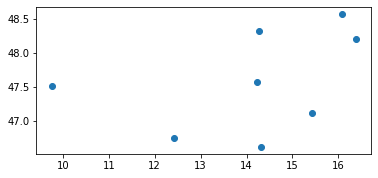

In [23]:
gdf.plot()